In [6]:
import matplotlib.pyplot as plt
import pyfolio as pf
import pandas as pd
import datetime
import pytz

import csv
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Read and save backtesting report file from MT5.
# Link: https://mechanicalforex.com/2015/11/powerful-statistical-analysis-take-your-mt4-backtesting-results-to-r.html
def proccessHTM():

    with open ("test.htm", "r") as myfile:
        s=myfile.read()

    soup = BeautifulSoup(s, 'html.parser')
    table = soup.find_all('table')[1]

    f = csv.writer(open("test.csv", "w"))
    f.writerow(["Time", "Type", "Order", "Size", "Price", "SL", "TP", "Profit", "Balance"])

    # variable to check length of rows
    x = (len(table.findAll('tr')) - 1)

    # set to run through x
    for row in table.findAll('tr')[1:x]:
        col = row.findAll('td')
        Time = col[1].getText()
        Type = col[2].getText()
        Order = col[3].getText()
        Size = col[4].getText()
        Price = col[5].getText()
        SL = col[6].getText()
        TP = col[7].getText()
        try:
            Profit = col[8].getText()
            Balance = col[9].getText()
        except:
            continue

        lineToAdd = (Time, Type, Order, Size, Price, SL, TP, Profit, Balance)
        f.writerow(lineToAdd)



In [3]:
# Link: https://mechanicalforex.com/2015/11/powerful-statistical-analysis-using-pyfolio-to-analyse-your-mt4-backtesting-results.html
def lastValue(x):
    try:
        reply = x[-1]
    except:
        reply = None
    return reply
 
tradeTimes = []
tradeBalance = []

with open("test.csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    
    i = 0
    for row in reader:
        if i > 1 and len(row) > 0:
            tradeTimes.append(datetime.datetime.strptime(row[0], '%Y.%m.%d %H:%M'))
            tradeBalance.append(float(row[8]))
        i += 1
        
returns = pd.Series(data=tradeBalance, index=tradeTimes).resample('D').agg(lastValue).pct_change(fill_method='pad').fillna(0).tz_localize('UTC')

In [11]:
tradeTimes

[datetime.datetime(1987, 1, 2, 21, 0),
 datetime.datetime(1987, 1, 9, 3, 0),
 datetime.datetime(1987, 1, 20, 12, 0),
 datetime.datetime(1987, 1, 23, 7, 0),
 datetime.datetime(1987, 1, 30, 14, 0),
 datetime.datetime(1987, 1, 30, 16, 0),
 datetime.datetime(1987, 2, 2, 9, 0),
 datetime.datetime(1987, 2, 6, 6, 0),
 datetime.datetime(1987, 2, 6, 11, 0),
 datetime.datetime(1987, 2, 18, 22, 0),
 datetime.datetime(1987, 3, 3, 15, 0),
 datetime.datetime(1987, 3, 5, 17, 0),
 datetime.datetime(1987, 3, 6, 14, 0),
 datetime.datetime(1987, 3, 11, 19, 0),
 datetime.datetime(1987, 3, 30, 6, 0),
 datetime.datetime(1987, 3, 30, 7, 0),
 datetime.datetime(1987, 4, 3, 13, 0),
 datetime.datetime(1987, 4, 3, 17, 0),
 datetime.datetime(1987, 4, 6, 17, 0),
 datetime.datetime(1987, 4, 8, 21, 0),
 datetime.datetime(1987, 4, 13, 3, 0),
 datetime.datetime(1987, 4, 23, 17, 0),
 datetime.datetime(1987, 4, 24, 14, 0),
 datetime.datetime(1987, 5, 15, 14, 0),
 datetime.datetime(1987, 5, 26, 2, 0),
 datetime.datetime(1

In [7]:
returns.head(20)

1987-01-02 00:00:00+00:00    0.000000
1987-01-03 00:00:00+00:00    0.000000
1987-01-04 00:00:00+00:00    0.000000
1987-01-05 00:00:00+00:00    0.000000
1987-01-06 00:00:00+00:00    0.000000
1987-01-07 00:00:00+00:00    0.000000
1987-01-08 00:00:00+00:00    0.000000
1987-01-09 00:00:00+00:00   -0.019938
1987-01-10 00:00:00+00:00    0.000000
1987-01-11 00:00:00+00:00    0.000000
1987-01-12 00:00:00+00:00    0.000000
1987-01-13 00:00:00+00:00    0.000000
1987-01-14 00:00:00+00:00    0.000000
1987-01-15 00:00:00+00:00    0.000000
1987-01-16 00:00:00+00:00    0.000000
1987-01-17 00:00:00+00:00    0.000000
1987-01-18 00:00:00+00:00    0.000000
1987-01-19 00:00:00+00:00    0.000000
1987-01-20 00:00:00+00:00   -0.011681
1987-01-21 00:00:00+00:00    0.000000
Freq: D, dtype: float64

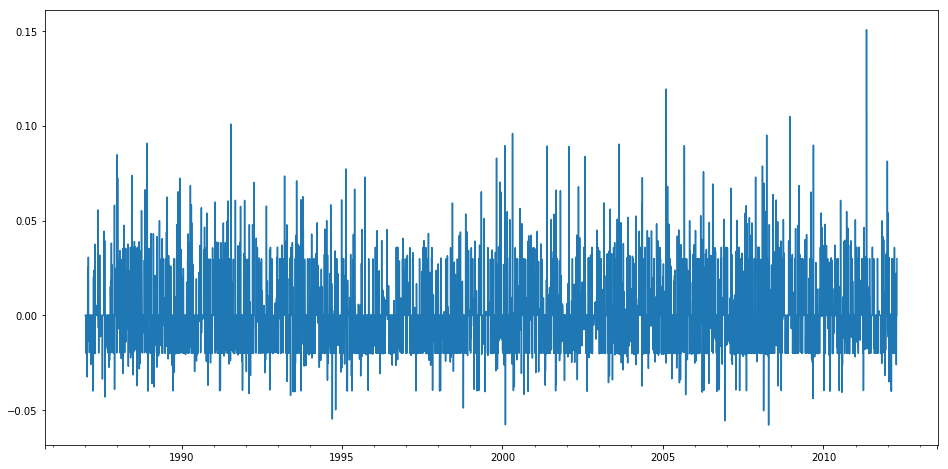

In [8]:
returns.plot(figsize=(16,8))

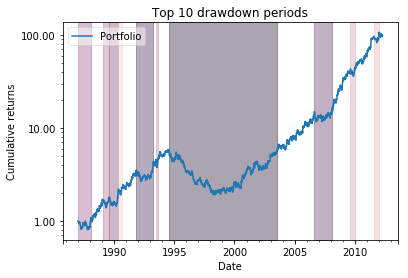

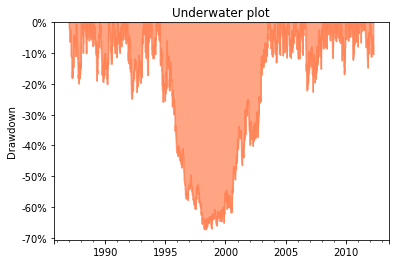

In [9]:
fig = plt.figure(facecolor='white')
plt.yscale('log')
ax = pf.plot_drawdown_periods(returns).set_xlabel('Date')

#plt.savefig('drawdownPeriods.png')

fig = plt.figure(facecolor='white')
ax = pf.plot_drawdown_underwater(returns)
#plt.savefig('underwaterPlot.png')

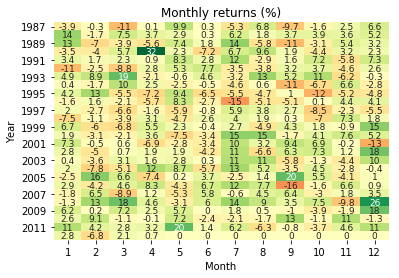

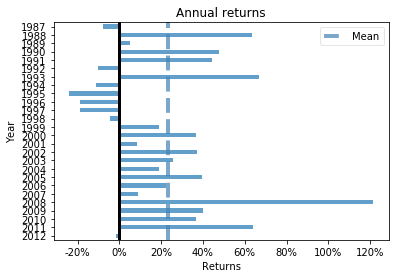

In [10]:
fig = plt.figure(facecolor='white')
ax = pf.plot_monthly_returns_heatmap(returns)
#plt.savefig('monthlyReturns.png')

fig = plt.figure(facecolor='white')
ax = pf.plot_annual_returns(returns)
#plt.savefig('annualReturns.png')

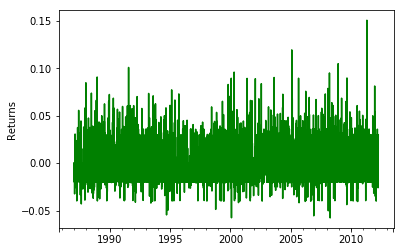

In [48]:
pf.plot_returns(returns)

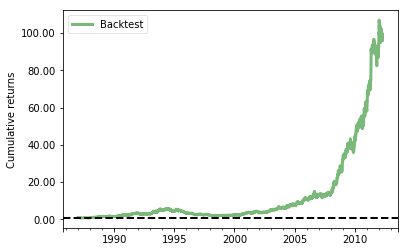

In [49]:
pf.plot_rolling_returns(returns)

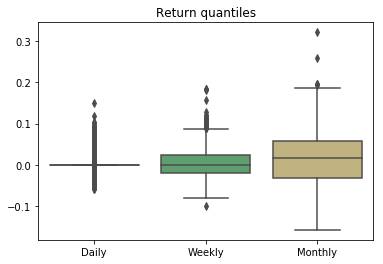

In [50]:
pf.plot_return_quantiles(returns)

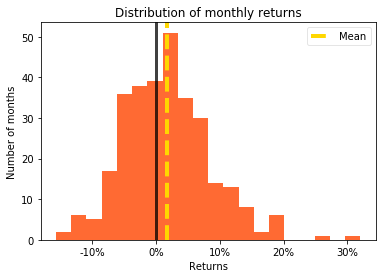

In [55]:
pf.plot_monthly_returns_dist(returns)

In [56]:
pf.show_perf_stats(returns)

Start date,1987-01-02
End date,2012-04-16
Total months,439
,Backtest
Annual return,13.3%
Cumulative returns,9769.8%
Annual volatility,20.6%
Sharpe ratio,0.71
Calmar ratio,0.20
Stability,0.77
Max drawdown,-67.3%


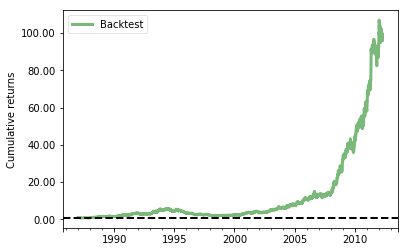

In [57]:
pf.plot_rolling_returns(returns)

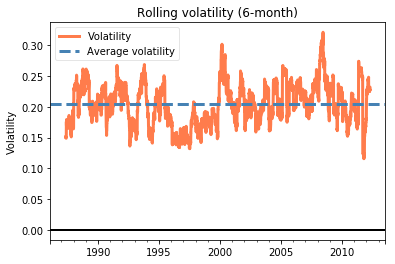

In [58]:
pf.plot_rolling_volatility(returns)

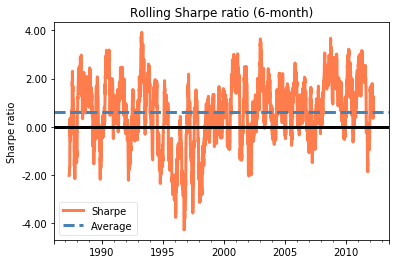

In [59]:
pf.plot_rolling_sharpe(returns)

In [60]:
pf.plot_gross_leverage(returns)

TypeError: plot_gross_leverage() missing 1 required positional argument: 'positions'

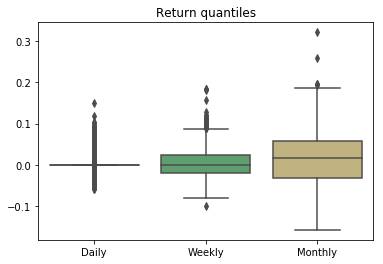

In [61]:
pf.plot_return_quantiles(returns)

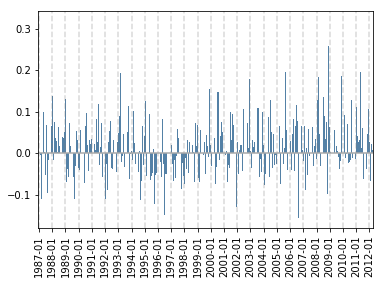

In [62]:
pf.plot_monthly_returns_timeseries(returns)

In [66]:
pf.perf_stats_bootstrap(returns)

AttributeError: module 'pyfolio' has no attribute 'perf_stats_bootstrap'

Start date,1987-01-02
End date,2012-04-16
Total months,439
,Backtest
Annual return,13.3%
Cumulative returns,9769.8%
Annual volatility,20.6%
Sharpe ratio,0.71
Calmar ratio,0.20
Stability,0.77
Max drawdown,-67.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,67.31,1994-07-11,1998-05-18,2003-07-08,2347
1,24.88,1991-11-04,1992-03-17,1993-03-11,354
2,22.64,2006-08-22,2007-04-10,2008-02-06,382
3,20.10,1989-07-27,1990-03-08,1990-04-17,189
4,19.91,1987-01-08,1987-10-22,1988-01-18,268


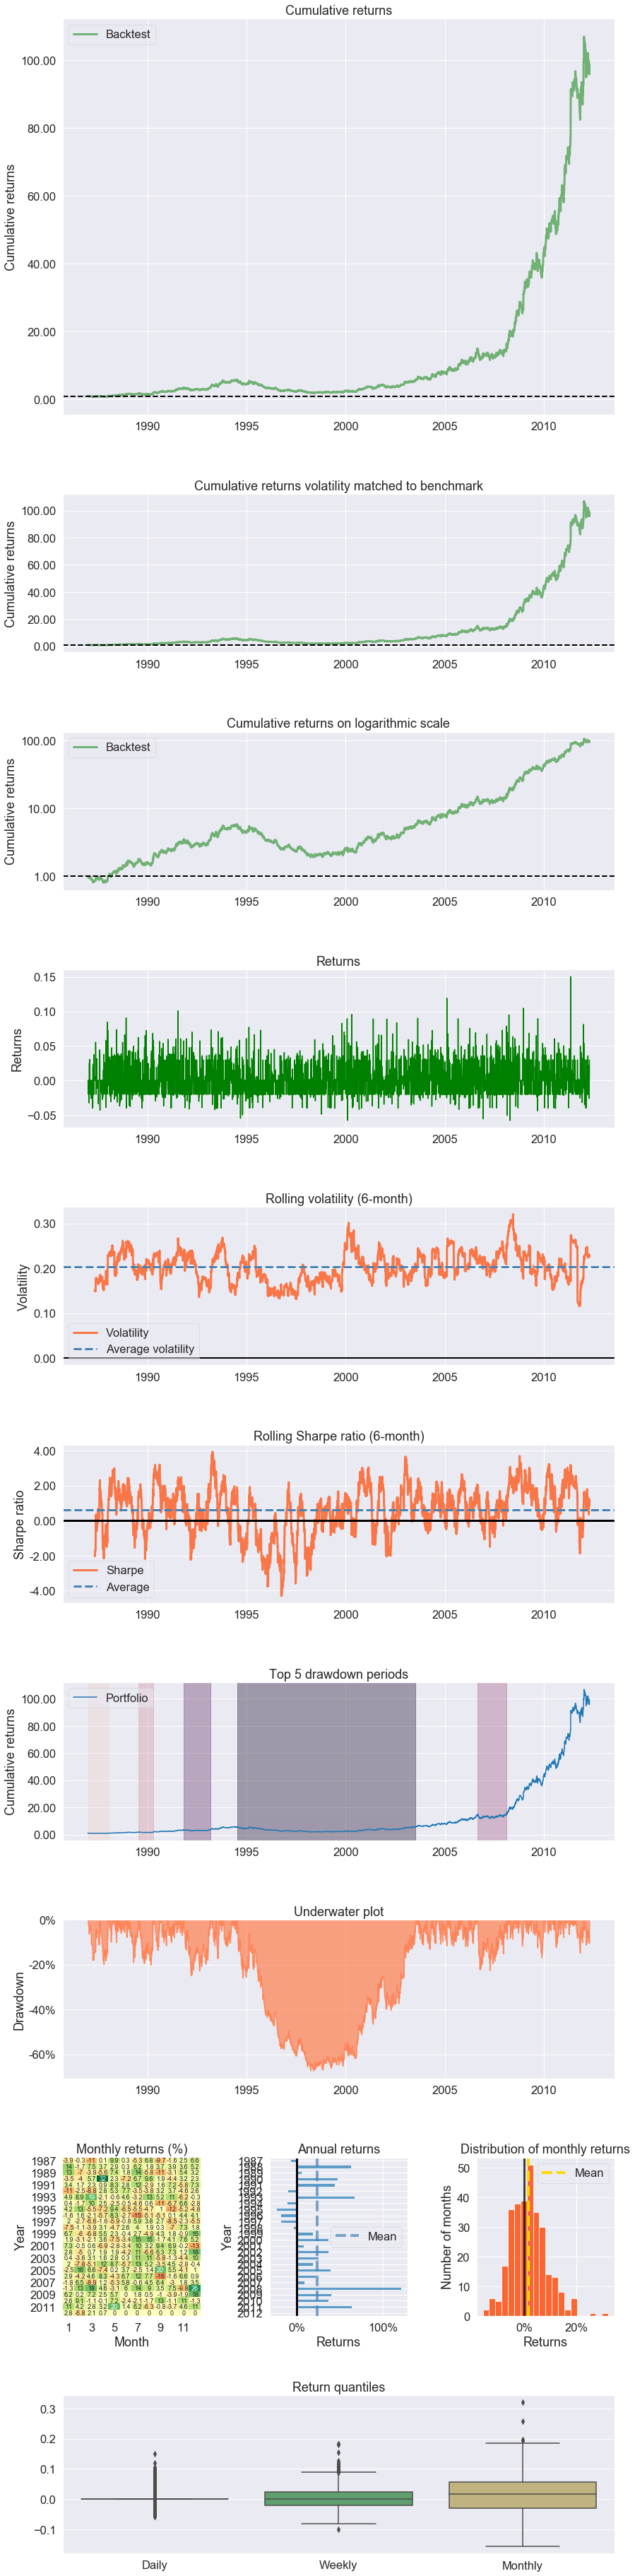

In [68]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

pf.create_returns_tear_sheet(returns)

In [ ]:
out_of_sample = returns.index[-40]
pf.create_bayesian_tear_sheet(returns, live_start_date = out_of_sample)

Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, volatility, mean returns]
Sampling 4 chains:   6%| | 604/10000 [13:17<2:52:14,  1.10s/draws]